In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calc_mean_erp(trial_points, ecog_data):
    """
    This function calculates the average Event-Related Potential (ERP) for each finger movement
    Parameters:
    trial_points + ecog_data 
    Returns:
    fingers_erp_mean + 5x1201 matrix containing average brain responses for each finger
    """
    
    # Read the data
    trial_data = pd.read_csv(trial_points).astype(int)
    brain_data = pd.read_csv(ecog_data).values.flatten()
    
    # Create result matrix
    fingers_erp_mean = np.zeros((5, 1201))
    
    # For each finger (1-5)
    for finger in range(1, 6):
        # Find all starting points for current finger
        finger_starts = trial_data[trial_data.iloc[:, 2] == finger].iloc[:, 0]
        
        # Create temporary matrix to store all 1201-point windows
        all_windows = np.zeros((len(finger_starts), 1201))
        
        # For each starting point
        for i, start in enumerate(finger_starts):
            # Extract window: 200ms before to 1000ms after
            window_start = start - 200
            window_end = start + 1001
            
            # Check if window is within array bounds
            if window_start >= 0 and window_end <= len(brain_data):
                all_windows[i] = brain_data[window_start:window_end]
        
        # Calculate average for current finger
        fingers_erp_mean[finger-1] = np.mean(all_windows, axis=0)
    
    return fingers_erp_mean

In [2]:
# Execute the function
fingers_erp_mean = calc_mean_erp('events_file_ordered.csv', 'brain_data_channel_one.csv')
print("Matrix shape:", fingers_erp_mean.shape)

# Display sample of the matrix (first 5 columns for each finger)
print("\nSample of the matrix (first 5 time points for each finger):")
print("Rows represent fingers 1-5, columns represent time points:")
print(fingers_erp_mean[:, :5])

Matrix shape: (5, 1201)

Sample of the matrix (first 5 time points for each finger):
Rows represent fingers 1-5, columns represent time points:
[[ 128.078125    140.1796875   135.1875      101.8515625    75.8203125 ]
 [-345.36134454 -342.79831933 -333.6302521  -323.08403361 -317.97478992]
 [-367.99166667 -346.64166667 -336.325      -344.95833333 -365.325     ]
 [ -89.54210526  -91.61578947  -84.07368421  -58.94736842  -34.61052632]
 [-171.59459459 -185.48648649 -201.13513514 -192.47297297 -170.93243243]]


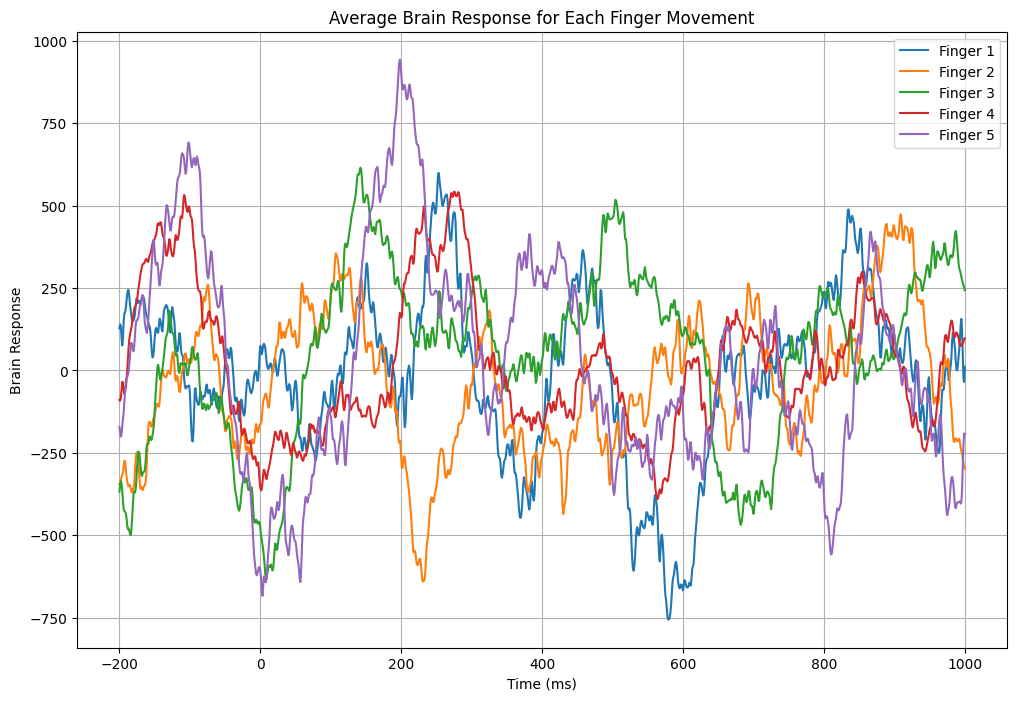

In [4]:
# Create and display the plot
plt.figure(figsize=(12, 8))
time = np.arange(-200, 1001)
for finger in range(5):
    plt.plot(time, fingers_erp_mean[finger], label=f'Finger {finger+1}')

plt.xlabel('Time (ms)')
plt.ylabel('Brain Response')
plt.title('Average Brain Response for Each Finger Movement')
plt.legend()
plt.grid(True)
plt.show()